### Using scipy.optimize
We now demonstrate how to use python to optimize objective functions:

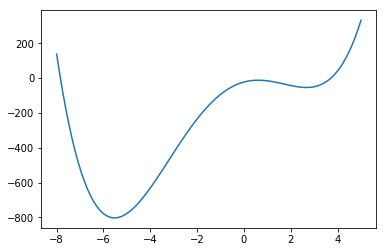

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

from scipy import optimize as opt
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1
x = np.linspace(-8, 5, 100) ##Example function 1
plt.plot(x, f(x));


In [9]:
opt.minimize_scalar(f, method='Brent')


     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663

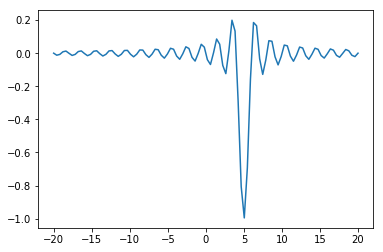

In [10]:
#Example 2
def f(x, offset):
    return -np.sinc(x-offset)
x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5));

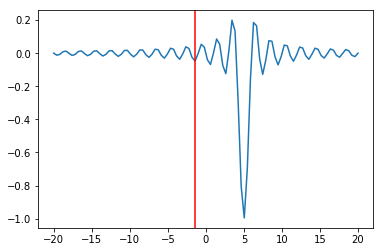

In [11]:
# note how additional function arguments are passed 
sol = opt.minimize_scalar(f, args=(5,))
sol

plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red')
pass


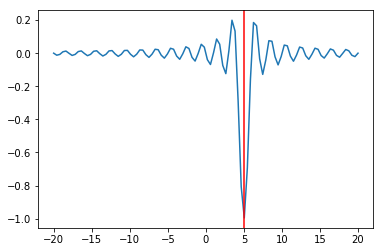

In [12]:
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [opt.minimize_scalar(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]
idx = np.argmin([sol.fun for sol in sols])
sol = sols[idx]
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red');

In [13]:
#Multivariate case https://en.wikipedia.org/wiki/Rosenbrock_function
from sympy import symbols, hessian, Function, N

x, y = symbols('x y')
f = symbols('f', cls=Function)

f = 100*(y - x**2)**2 + (1 - x)**2 #https://en.wikipedia.org/wiki/Rosenbrock_function

H = hessian(f, [x, y]).subs([(x,1), (y,1)])
H, N(H.condition_number())

(Matrix([
 [ 802, -400],
 [-400,  200]]), 2508.00960127744)

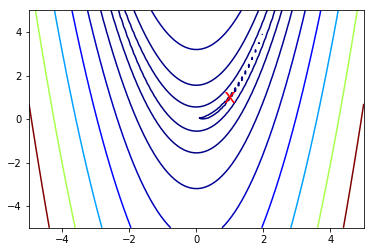

In [14]:


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
# Note: the global minimum is at (1,1) in a tiny contour island
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20);


In [15]:
from scipy.optimize import rosen, rosen_der, rosen_hess
x0 = np.array([4,-4.1])

ps = [x0]
opt.minimize(rosen, x0, method='BFGS')

      fun: 9.48988612333806e-12
 hess_inv: array([[0.49995593, 0.99988908],
       [0.99988908, 2.00468039]])
      jac: array([ 4.39252450e-05, -2.03651389e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 56
     njev: 132
   status: 2
  success: False
        x: array([0.99999712, 0.99999413])

### Newton's method

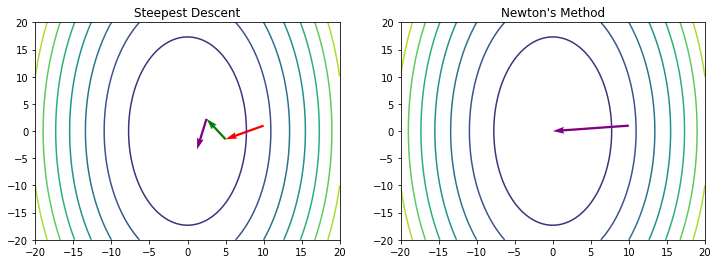

In [26]:
def Quad(x):
    return ((x[1:])**2.0 + 5*(x[:-1])**2.0)

def DQuad(x,y):
    return (np.array([2.0*x,10.0*y]))

x = np.linspace(-20,20, 100)
y = np.linspace(-20,20, 100)
X, Y = np.meshgrid(x, y)
Z = Quad(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
Hinv=-np.array([[0.5,0],[0,0.1]])
plt.figure(figsize=(12,4))
plt.subplot(121)

plt.contour(X,Y,Z);
plt.title("Steepest Descent");
step=-0.25
X0 = 10.0
Y0 = 1.0

Ngrad=Hinv.dot(DQuad(X0,Y0))

sgrad = step*DQuad(X0,Y0)
plt.quiver(X0,Y0,sgrad[0],sgrad[1],color='red',angles='xy',scale_units='xy',scale=1);
X1 = X0 + sgrad[0]
Y1 = Y0 + sgrad[1]
sgrad = step*DQuad(X1,Y1)
plt.quiver(X1,Y1,sgrad[0],sgrad[1],color='green',angles='xy',scale_units='xy',scale=1);
X2 = X1 + sgrad[0]
Y2 = Y1 + sgrad[1]
sgrad = step*DQuad(X2,Y2)
plt.quiver(X2,Y2,sgrad[0],sgrad[1],color='purple',angles='xy',scale_units='xy',scale=1);


plt.subplot(122)
plt.contour(X,Y,Z);
plt.title("Newton's Method")
plt.quiver(X0,Y0,Ngrad[0],Ngrad[1],color='purple',angles='xy',scale_units='xy',scale=1);

#Compute Hessian and plot again.


### Logistic Regression via Gradient descent

Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


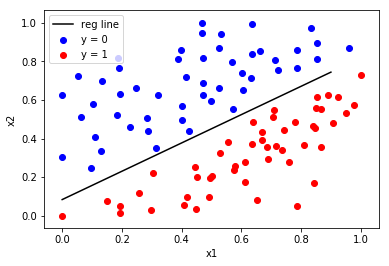

In [28]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 


def loadCSV(filename): 
	''' 
	function to load dataset 
	'''
	with open(filename,"r") as csvfile: 
		lines = csv.reader(csvfile) 
		dataset = list(lines) 
		for i in range(len(dataset)): 
			dataset[i] = [float(x) for x in dataset[i]]	 
	return np.array(dataset) 


def normalize(X): 
	''' 
	function to normalize feature matrix, X 
	'''
	mins = np.min(X, axis = 0) 
	maxs = np.max(X, axis = 0) 
	rng = maxs - mins 
	norm_X = 1 - ((maxs - X)/rng) 
	return norm_X 


def logistic_func(beta, X): 
	''' 
	logistic(sigmoid) function 
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 


def log_gradient(beta, X, y): 
	''' 
	logistic gradient function 
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
	final_calc = np.dot(first_calc.T, X) 
	return final_calc 


def cost_func(beta, X, y): 
	''' 
	cost function, J 
	'''
	log_func_v = logistic_func(beta, X) 
	y = np.squeeze(y) 
	step1 = y * np.log(log_func_v) 
	step2 = (1 - y) * np.log(1 - log_func_v) 
	final = -step1 - step2 
	return np.mean(final) 


def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
	''' 
	gradient descent function 
	'''
	cost = cost_func(beta, X, y) 
	change_cost = 1
	num_iter = 1
	
	while(change_cost > converge_change): 
		old_cost = cost 
		beta = beta - (lr * log_gradient(beta, X, y)) 
		cost = cost_func(beta, X, y) 
		change_cost = old_cost - cost 
		num_iter += 1
	
	return beta, num_iter 


def pred_values(beta, X): 
	''' 
	function to predict labels 
	'''
	pred_prob = logistic_func(beta, X) 
	pred_value = np.where(pred_prob >= .5, 1, 0) 
	return np.squeeze(pred_value) 


def plot_reg(X, y, beta): 
	''' 
	function to plot decision boundary 
	'''
	# labelled observations 
	x_0 = X[np.where(y == 0.0)] 
	x_1 = X[np.where(y == 1.0)] 
	
	# plotting points with diff color for diff label 
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
	
	# plotting decision boundary 
	x1 = np.arange(0, 1, 0.1) 
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
	plt.plot(x1, x2, c='k', label='reg line') 

	plt.xlabel('x1') 
	plt.ylabel('x2') 
	plt.legend() 
	plt.show() 
	

	
if __name__ == "__main__": 
	# load the dataset 
	dataset = loadCSV('dataset1.csv') 
	
	# normalizing feature matrix 
	X = normalize(dataset[:, :-1]) 
	
	# stacking columns wth all ones in feature matrix 
	X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 

	# response vector 
	y = dataset[:, -1] 
    

    

	# initial beta values 
	beta = np.matrix(np.zeros(X.shape[1])) 

	# beta values after running gradient descent 
	beta, num_iter = grad_desc(X, y, beta) 

	# estimated beta values and number of iterations 
	print("Estimated regression coefficients:", beta) 
	print("No. of iterations:", num_iter) 

	# predicted labels 
	y_pred = pred_values(beta, X) 
	
	# number of correctly predicted labels 
	print("Correctly predicted labels:", np.sum(y == y_pred)) 
    
    
	# plotting regression line 
	plot_reg(X, y, beta) 


## Logistic Regression using Sklearn

In [1]:
from sklearn.datasets import load_digits ##first on a small dataset
digits = load_digits()

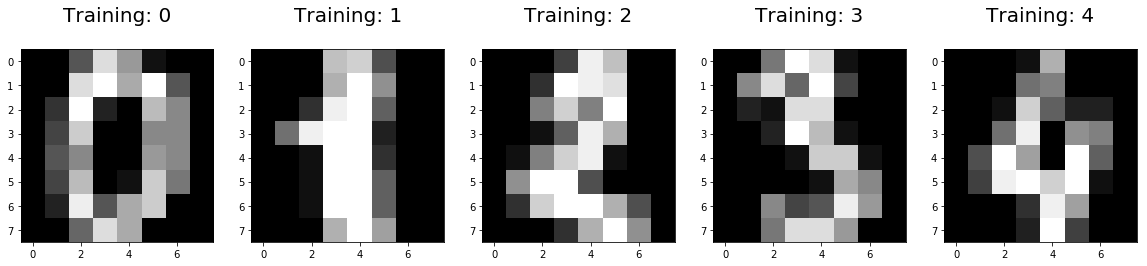

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression


In [6]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [8]:
logisticRegr.predict(x_test[0:10]) ## Just making predictions on few test data samples


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [10]:
predictions = logisticRegr.predict(x_test) #making prediction on entire test data samples


In [11]:
# Use score method to get accuracy of model -- score = correct predictions / total number of data points
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [12]:
# get confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [13]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


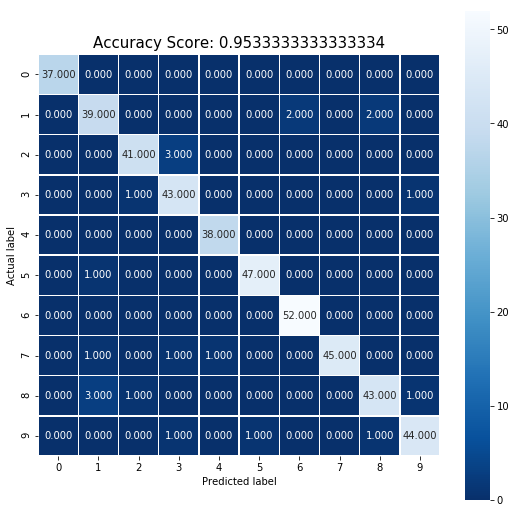

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [15]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)

#train-test splitting
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


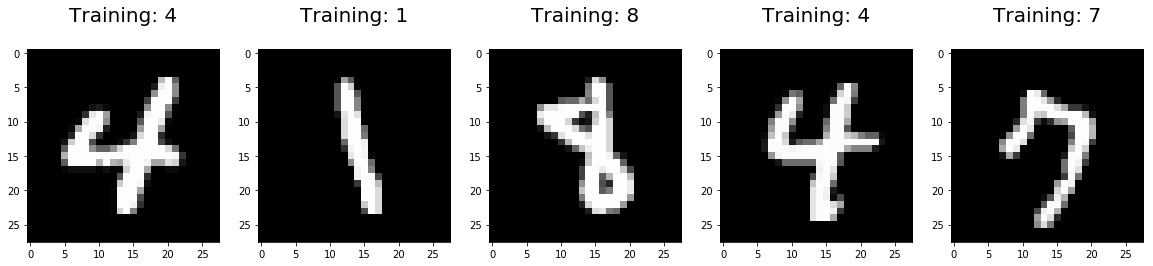

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [17]:
from sklearn.linear_model import LogisticRegression


In [18]:
###logisticRegr = LogisticRegression() ##default solver Takes around 48 minutes to run! ##
logisticRegr = LogisticRegression(solver = 'lbfgs') #'lbfgs' is an optimization technique that is fast for some problems.


In [19]:
logisticRegr.fit(train_img, train_lbl)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
logisticRegr.predict(test_img[0].reshape(1,-1))


array([1.])

In [21]:
predictions = logisticRegr.predict(test_img)


In [22]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9134
